In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


In [2]:
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.24.3
pandas version :  1.5.3
seaborn version :  0.12.2


In [3]:
df = pd.read_csv('Travel.csv')

# Data Pre-Processing

In [4]:
df_prep = df.copy()
df_prep = df_prep.drop(columns='CustomerID')

## Handling Missing Values

In [5]:
miss_cols = df_prep.columns[df_prep.isnull().any()]
missing_df = df_prep[miss_cols].isnull().sum()
print(missing_df)

Age                         226
TypeofContact                25
DurationOfPitch             251
NumberOfFollowups            45
PreferredPropertyStar        26
NumberOfTrips               140
NumberOfChildrenVisiting     66
MonthlyIncome               233
dtype: int64


In [6]:
df_prep['Age'].fillna(df_prep['Age'].mean(), inplace=True)
df_prep.dropna(subset=['TypeofContact'], inplace=True)
df_prep['DurationOfPitch'].fillna(df_prep['DurationOfPitch'].median(), inplace=True)
df_prep['NumberOfFollowups'].fillna(0, inplace=True)
df_prep['PreferredPropertyStar'].fillna(3, inplace=True)
df_prep['NumberOfTrips'].fillna(df_prep['NumberOfTrips'].median(), inplace=True)
df_prep['NumberOfChildrenVisiting'].fillna(0, inplace=True)
df_prep['MonthlyIncome'].fillna(df_prep['MonthlyIncome'].median(), inplace=True)

In [7]:
print('Apakah masih ada nilai null?', df_prep.isnull().any())

Apakah masih ada nilai null? ProdTaken                   False
Age                         False
TypeofContact               False
CityTier                    False
DurationOfPitch             False
Occupation                  False
Gender                      False
NumberOfPersonVisiting      False
NumberOfFollowups           False
ProductPitched              False
PreferredPropertyStar       False
MaritalStatus               False
NumberOfTrips               False
Passport                    False
PitchSatisfactionScore      False
OwnCar                      False
NumberOfChildrenVisiting    False
Designation                 False
MonthlyIncome               False
dtype: bool


In [8]:
df_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4863.0,0.188567,0.391204,0.0,0.0,0.0,0.0,1.0
Age,4863.0,37.661039,9.098037,18.0,31.0,37.0,43.0,61.0
CityTier,4863.0,1.654329,0.916498,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4863.0,15.375077,8.335788,5.0,9.0,13.0,19.0,127.0
NumberOfPersonVisiting,4863.0,2.908081,0.724762,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4863.0,3.676331,1.057630,0.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4863.0,3.578655,0.796907,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4863.0,3.231339,1.822589,1.0,2.0,3.0,4.0,22.0
Passport,4863.0,0.292412,0.454917,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4863.0,3.079581,1.366446,1.0,2.0,3.0,4.0,5.0


## Handling Duplicates values

In [9]:
print('There is',df_prep.duplicated().sum(),'duplicated value')

There is 141 duplicated value


In [10]:
df_prep.drop_duplicates(keep='first', inplace=True)

In [11]:
print('There is',df_prep.duplicated().sum(),'duplicated value')

There is 0 duplicated value


## Handling Inconsistent Categorical Values

In [12]:
pd.set_option('display.max_rows', 5000)
for i in df_prep.columns:
    if i not in 'CustomerID':
        print(f'''Value count kolom {i}:''')
        print(df_prep[i].value_counts())
        print()
    

Value count kolom ProdTaken:
0    3831
1     891
Name: ProdTaken, dtype: int64

Value count kolom Age:
35.000000    231
36.000000    222
37.622265    216
34.000000    200
30.000000    193
32.000000    188
31.000000    187
37.000000    182
33.000000    181
29.000000    175
38.000000    172
41.000000    149
39.000000    148
40.000000    143
28.000000    141
42.000000    137
27.000000    133
43.000000    125
46.000000    117
45.000000    109
26.000000    100
44.000000     99
51.000000     88
47.000000     87
50.000000     84
25.000000     72
52.000000     68
49.000000     65
48.000000     64
53.000000     64
55.000000     63
54.000000     59
56.000000     55
24.000000     53
23.000000     46
22.000000     46
59.000000     42
21.000000     41
20.000000     38
19.000000     32
58.000000     30
57.000000     28
60.000000     27
18.000000     14
61.000000      8
Name: Age, dtype: int64

Value count kolom TypeofContact:
Self Enquiry       3350
Company Invited    1372
Name: TypeofContact, dtype

Diketahui bahwa ada ketidakkonsistenan pada feature gerder(Fe Male), dan maritalstatus(Singe dengan unmaried yang memiliki definisi sama)

In [13]:
df_prep['Gender'] = df_prep['Gender'].replace('Fe Male', 'Female')
df_prep['MaritalStatus'] = df_prep['MaritalStatus'].replace('Single', 'Unmarried')

In [14]:
handled = ['Gender', 'MaritalStatus']
for i in handled:
    print(f'''Value count kolom {i}:''')
    print(df_prep[i].value_counts())
    print()

Value count kolom Gender:
Male      2820
Female    1902
Name: Gender, dtype: int64

Value count kolom MaritalStatus:
Married      2264
Unmarried    1514
Divorced      944
Name: MaritalStatus, dtype: int64



### Handling outliers

In [15]:
from scipy import stats

In [16]:
df_prep_before = df

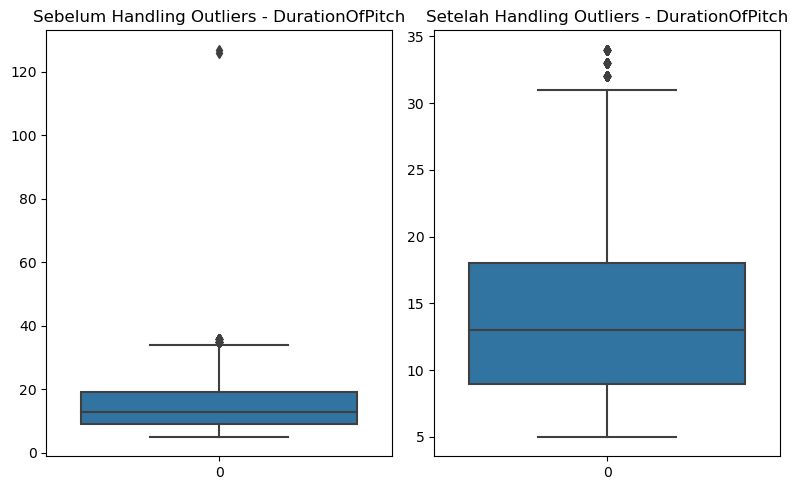

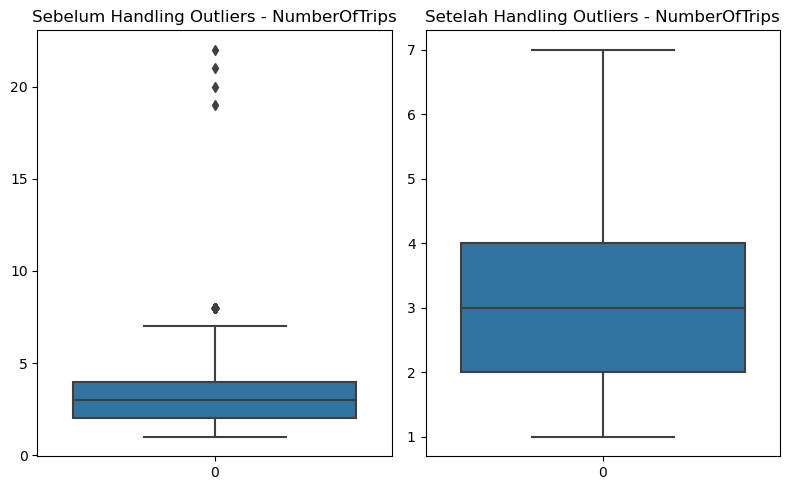

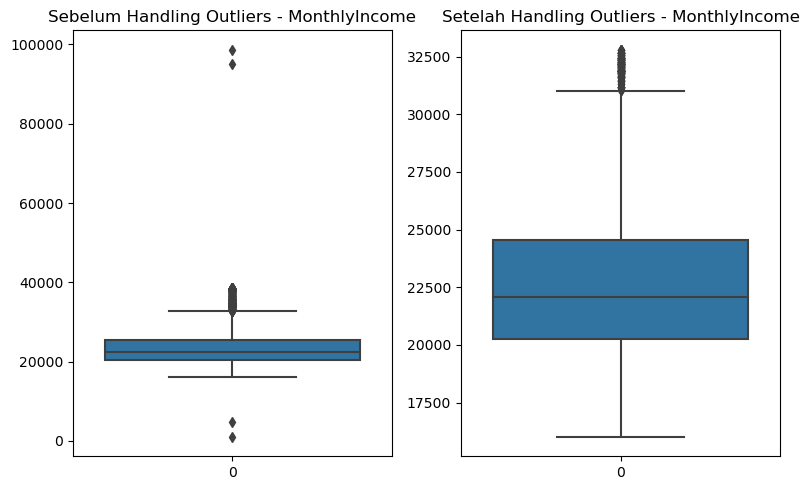

In [17]:
features = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']

for col in features:
    plt.figure(figsize=(8, 5))

    # Boxplot sebelum penanganan outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df_prep[col])
    plt.title(f'Sebelum Handling Outliers - {col}')

    # Handling outliers dengan IQR
    Q1 = df_prep[col].quantile(0.25)
    Q3 = df_prep[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = df_prep[(df_prep[col] >= lower_bound) & (df_prep[col] <= upper_bound)]

    # Boxplot setelah penanganan outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(data=filtered_data[col])
    plt.title(f'Setelah Handling Outliers - {col}')

    plt.tight_layout()
    plt.show()

## Feature Engineering

### Feature Selection

In [18]:
def correlation(dataset, threshold):
    col_corr = set()  #
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
corr_features = correlation(df_prep.select_dtypes(exclude=object).drop(columns='ProdTaken'), 0.7)
corr_features

set()

Diketahui dari percobaan code diatas bahwa semua feature dapat digunakan dikarenakan tidak ada yang redundant jika menggunakan threshold 0.7

### Feature Extraction

Melakukan segmentasi pada feature Age dan Income

In [20]:
def segment(x):
    if x['Age'] <= 21:
        segment = 'Teen'
    elif (x['Age'] >= 21 and x['Age'] <= 55):
        segment = 'Adult'
    else:
        segment = 'Elderly'
    return segment

In [21]:
df_prep['segmentasi_umur'] = df_prep.apply(lambda x: segment(x), axis=1)
df_prep.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,segmentasi_umur
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,Adult
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Adult
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,Adult
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Adult
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,Adult


In [22]:
def segmentasi_income(a):
        if a['MonthlyIncome'] <= 1045:
            segmentasi = 'Low Income'
        elif 1046 <= a['MonthlyIncome'] <= 1275:
            segmentasi = 'Middle Income'
        else:
            segmentasi = 'High Income'
        return segmentasi

In [23]:
df_prep['segmentasi_income'] = df_prep.apply(lambda x: segmentasi_income(x), axis=1)
df_prep.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,segmentasi_umur,segmentasi_income
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,...,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,Adult,High Income
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,...,Divorced,2.0,0,3,1,2.0,Manager,20130.0,Adult,High Income
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,...,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,Adult,High Income
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,...,Divorced,2.0,1,5,1,1.0,Executive,17909.0,Adult,High Income
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,...,Divorced,1.0,0,5,1,0.0,Executive,18468.0,Adult,High Income


### Feature Encoding

In [24]:
# Label Encoding
df_prep['segmentasi_umur'] = df_prep['segmentasi_umur'].map({'Teen':0,
                                                            'Adult':1,
                                                            'Elderly':2})
df_prep['segmentasi_income'] =  df_prep['segmentasi_income'].map({'Low Income':0,
                                                          'Middle Income':1,
                                                          'High Income':2})

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
#One hot encoding
encoder = OneHotEncoder(sparse=False)
for cat in ['TypeofContact', 'Occupation', 'MaritalStatus','Designation','Gender','ProductPitched']:
    onehots = pd.DataFrame(encoder.fit_transform(df[[cat]]), columns=encoder.get_feature_names_out([cat]))
    df_prep = df_prep.join(onehots)

In [27]:
df_prep.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,Designation_Senior Manager,Designation_VP,Gender_Fe Male,Gender_Female,Gender_Male,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


### Split Data into training and testing

In [28]:
X = df_prep.select_dtypes(exclude=object).drop(columns='ProdTaken') # menggunakan semua feature kecuali target
y = df_prep['ProdTaken']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42) #Splitting 

In [30]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3305, 38) (1417, 38) (3305,) (1417,)


### Feature Transformation

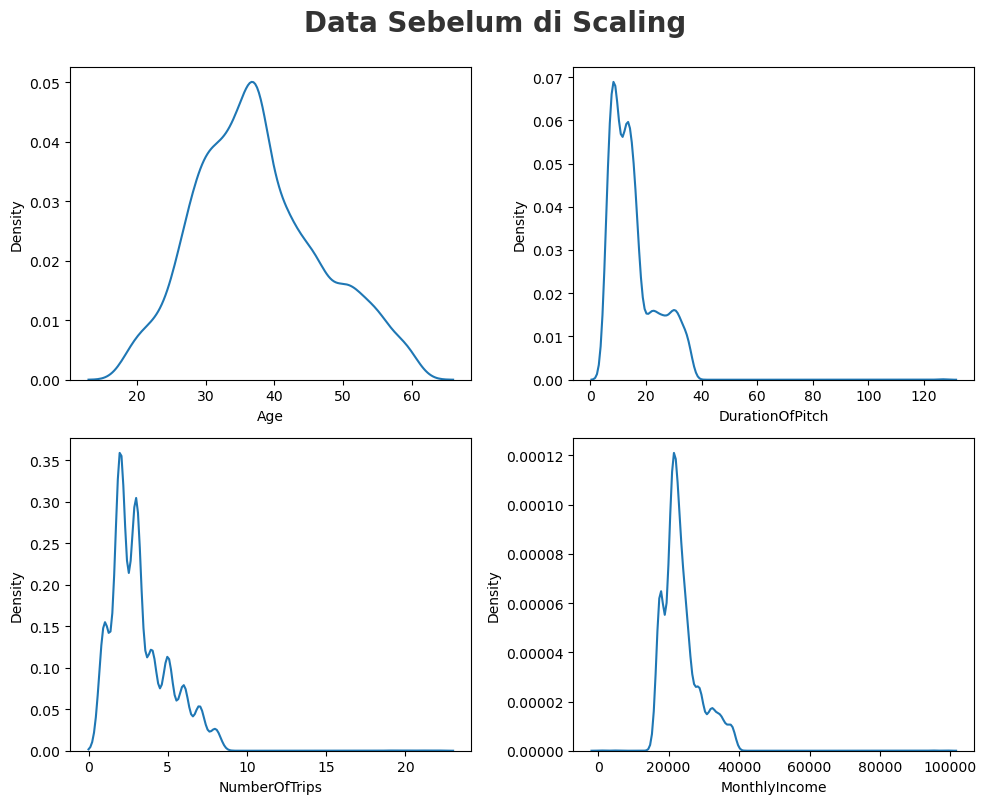

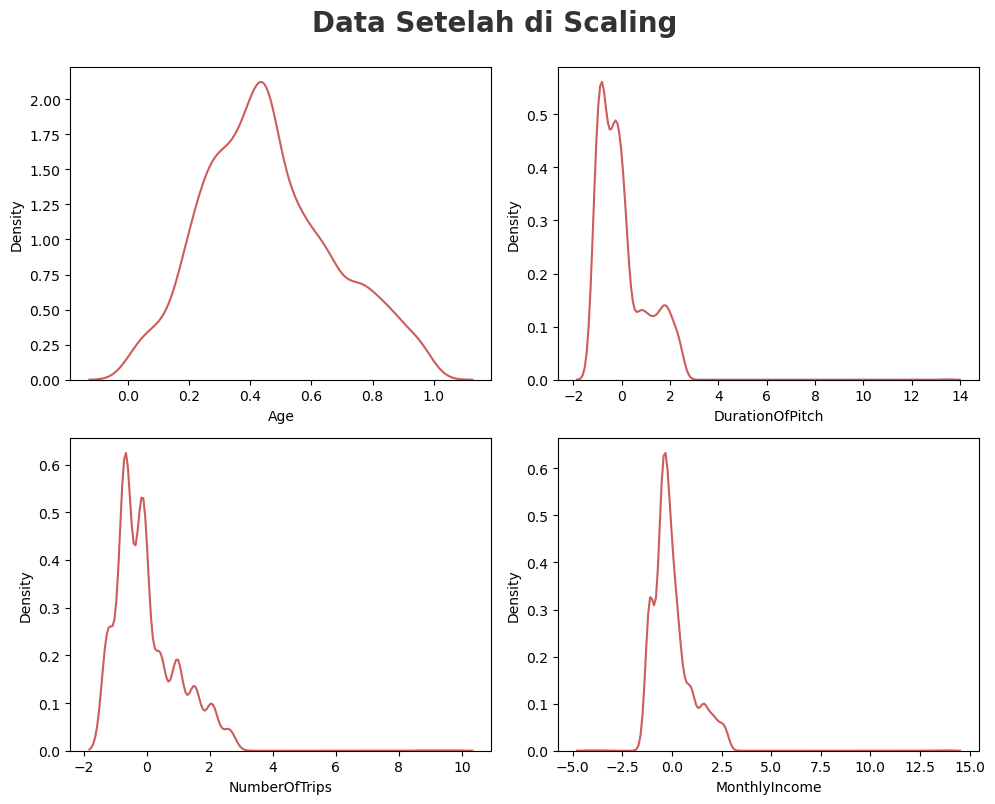

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Inisialisasi MinMaxScaler untuk Age dan NumberOfTrips
minmax_scaler = MinMaxScaler()
X_train[['Age']] = minmax_scaler.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax_scaler.transform(X_test[['Age']])

# Inisialisasi StandardScaler untuk DurationOfPitch dan MonthlyIncome
standard_scaler = StandardScaler()
X_train[['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']] = standard_scaler.fit_transform(X_train[['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']])
X_test[['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']] = standard_scaler.transform(X_test[['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']])

plt.figure(figsize=(10, 8))
plt.suptitle('Data Sebelum di Scaling', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Plot KDE untuk setiap kolom numerik sebelum scaling
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df_prep[col])
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
plt.suptitle('Data Setelah di Scaling', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Plot KDE untuk setiap kolom numerik setelah scaling
for i, col in enumerate(['Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=X_train[col], color='indianred')
    plt.xlabel(col)
    
plt.tight_layout()
plt.show()

### Feature Selection Menggunakan Variance

In [32]:
from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(0.2)
var.fit(X_train)
X_train_fs = pd.DataFrame(var.transform(X_train),columns=var.get_feature_names_out())
X_test_fs = pd.DataFrame(var.transform(X_test),columns=var.get_feature_names_out())

In [44]:
X_train_fs.columns

Index(['CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome',
       'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry',
       'Occupation_Salaried', 'Occupation_Small Business',
       'MaritalStatus_Married', 'Designation_Executive', 'Designation_Manager',
       'Gender_Female', 'Gender_Male', 'ProductPitched_Basic',
       'ProductPitched_Deluxe'],
      dtype='object')

In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

nums_col = ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']
 
classif = SelectKBest(f_classif, k=3)
classif.fit(X_train_fs[nums_col], y_train)
X_train_nums = pd.DataFrame(classif.transform(X_train_fs[nums_col]), columns=classif.get_feature_names_out())
X_test_nums = pd.DataFrame(classif.transform(X_test_fs[nums_col]), columns=classif.get_feature_names_out())

In [35]:
from sklearn.feature_selection import chi2

cats_col = ['CityTier', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'PreferredPropertyStar',
       'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'TypeofContact_Company Invited', 'TypeofContact_Self Enquiry',
       'Occupation_Salaried', 'Occupation_Small Business',
       'MaritalStatus_Married', 'Designation_Executive', 'Designation_Manager',
       'Gender_Female', 'Gender_Male', 'ProductPitched_Basic',
       'ProductPitched_Deluxe']

chi2 = SelectKBest(chi2,k=8)
chi2.fit(X_train_fs[cats_col],y_train)
X_train_chi2 = pd.DataFrame(chi2.transform(X_train_fs[cats_col]),columns=chi2.get_feature_names_out())
X_test_chi2 = pd.DataFrame(chi2.transform(X_test_fs[cats_col]),columns=chi2.get_feature_names_out())

In [36]:
# merging all feature selection result
col_all = classif.get_feature_names_out().tolist() + chi2.get_feature_names_out().tolist()
X_train = X_train[col_all]
X_test = X_test[col_all]

print('Feature hasil seleksi adalah :', col_all)

Feature hasil seleksi adalah : ['DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome', 'CityTier', 'NumberOfFollowups', 'Passport', 'MaritalStatus_Married', 'Designation_Executive', 'Designation_Manager', 'ProductPitched_Basic', 'ProductPitched_Deluxe']


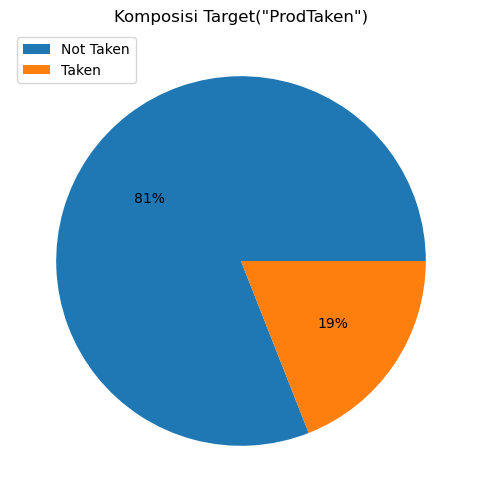

In [37]:
plt.figure(figsize=(6, 6))
plt.pie(y_train.value_counts(), autopct='%1.0f%%')
plt.title('Komposisi Target("ProdTaken")')
plt.legend(labels=['Not Taken', 'Taken'], loc='upper left')

plt.show()

Karena adanya imbalace pada target di data training make perlu dilakukan handling imbalance class

### Handling Imbalanced Dataset

In [38]:
from imblearn.over_sampling import SMOTE

In [41]:
from imblearn.over_sampling import SMOTE

print('Jumlah data latih sebelum SMOTE terdiri dari', len(X_train), 'baris')
print('Jumlah class 0:', sum(y_train == 0))  
print('Jumlah class 1:', sum(y_train == 1), '\n') 

# Lakukan resampling hanya pada data latih
smote = SMOTE(random_state = 42, sampling_strategy = 1.0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f'Jumlah data latih setelah SMOTE terdiri dari {len(X_train_resampled)} baris')
print(f'Jumlah class 0: {sum(y_train_resampled==0)}')
print(f'Jumlah class 1: {sum(y_train_resampled==1)}\n')

# Pastikan untuk tetap menggunakan data uji yang belum diubah
print(f'Jumlah data uji: {len(X_test)}')

Jumlah data latih sebelum SMOTE terdiri dari 3305 baris
Jumlah class 0: 2676
Jumlah class 1: 629 

Jumlah data latih setelah SMOTE terdiri dari 5352 baris
Jumlah class 0: 2676
Jumlah class 1: 2676

Jumlah data uji: 1417


Pisahkan CSV

In [45]:
X_train.to_csv('Travel_Prep_train.csv', index=False)
X_test.to_csv('Travel_Prep_test.csv', index=False)

# Modeling